# BIFET verification example_light_Dxx

In example Dxx

we propose a pure diffusion testing case with (n+1) dimension setting

the PDE equation reads

$-\nabla_\mathbf{x}\cdot\mathcal{D}_{\mathbf{xx}}\nabla_\mathbf{x} u = f(\mathbf{x})$

we apply homogeneous Dirichlet boundary condition in $\mathbf{x}$ domain

$u = 0$, $\mathbf{x}\in\Omega_x$

By imposing an analytical solution

$u(\mathbf{x}) = \prod_\xi\sin(\frac{(\xi-\xi_{min})\pi}{\xi_{max}-\xi_{min}})$ where $\xi\in\{\mathbf{x}\}$

we can derive $f(\mathbf{x})$ manually

here we present comparison and relative error estimation between analytical and numerical solutions

* $\xi_{min} = 0$, $\xi_{max} = 1$
* $D_{00} = 10z^2$
* $D_{11} = x^2$
* $D_{12} = D_{21} = xy$
* $D_{22} = y^2$

the final L2 errors are estimated internally with deal.II functions

## 1. time-independent solver

Populating the interactive namespace from numpy and matplotlib


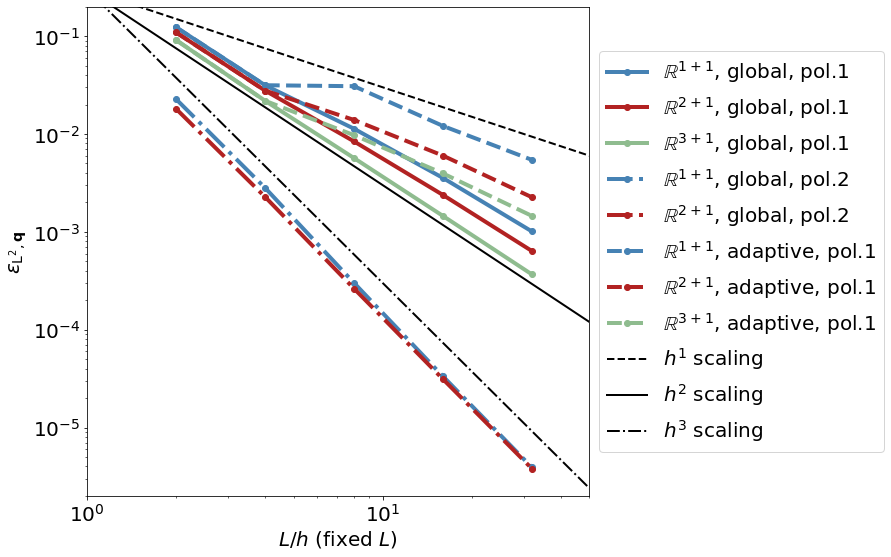

In [1]:
%pylab inline
import matplotlib.pyplot as plt

# dim 1+1
# refine global
# pol. 1
e_1d_rg1 = array(matrix('3 0    0.123124;\
8 1    0.0314778;\
17 2    0.0113054;\
28 3    0.00354749;\
45 4    0.00100738'))

# dim 1+1
# refine adaptive
# pol. 1
e_1d_ra1 = array(matrix('3 0    0.123124;\
8 1    0.0314778;\
16 2    0.030775;\
23 3    0.0120647;\
31 4    0.00542967'))

# dim 1+1
# refine global
# pol. 2
e_1d_rg2 = array(matrix('12 0    0.022697;\
24 1    0.00281392;\
44 2    0.000300293;\
78 3    3.32941e-05;\
137 4    3.90491e-06'))

# dim 2+1
# refine global
# pol. 1
e_2d_rg1 = array(matrix('3 0    0.109094;\
15 1    0.0277495;\
26 2    0.0083918;\
46 3    0.00237692;\
85 4    0.000635359'))

# dim 2+1
# refine adaptive
# pol. 1
e_2d_ra1 = array(matrix('3 0    0.109094;\
15 1    0.0277495;\
25 2    0.0139009;\
37 3    0.00599928;\
55 4    0.00225279'))

# dim 1+1
# refine global
# pol. 2
e_2d_rg2 = array(matrix('18 0    0.0180646;\
36 1    0.00227401;\
68 2    0.000262712;\
125 3    3.11379e-05;\
216 4    3.78879e-06'))

# dim 3+1
# refine adaptive
# pol. 1
e_3d_ra1 = array(matrix('3 0    0.09114;\
16 1    0.0218394;\
24 2    0.00971579;\
39 3    0.00394816;\
61 4    0.00145197'))


# dim 3+1
# refine global
# pol. 1
e_3d_rg1 = array(matrix('3 0    0.09114;\
16 1    0.0218394;\
25 2    0.00566659;\
42 3    0.00145117;\
76 4    0.000366426'))

fig1, ax1 = plt.subplots(figsize=(9,9))
#matplotlib.pyplot.grid(True, which="both")

ylim = (2.e-6,0.2)

g1 = ax1.plot(2**(e_1d_rg1[:,1]+1),e_1d_rg1[:,2],
              marker='o',markersize=6,color='steelblue',linewidth=4,
              label=r'$\mathbb{R}^{1+1}$, global, pol.1')
g2 = ax1.plot(2**(e_2d_rg1[:,1]+1),e_2d_rg1[:,2],
              marker='o',markersize=6,color='firebrick',linewidth=4,
              label=r'$\mathbb{R}^{2+1}$, global, pol.1')
g3 = ax1.plot(2**(e_3d_rg1[:,1]+1),e_3d_rg1[:,2],
              marker='o',markersize=6,c='darkseagreen',linewidth=4,
              label=r'$\mathbb{R}^{3+1}$, global, pol.1')

g12 = ax1.plot(2**(e_1d_rg2[:,1]+1),e_1d_rg2[:,2],
               marker='o',markersize=6,c='steelblue',linewidth=4,linestyle='-.',
               label=r'$\mathbb{R}^{1+1}$, global, pol.2')
g22 = ax1.plot(2**(e_2d_rg2[:,1]+1),e_2d_rg2[:,2],
               marker='o',markersize=6,c='firebrick',linewidth=4,linestyle='-.',
               label=r'$\mathbb{R}^{2+1}$, global, pol.2')

a1 = ax1.plot(2**(e_1d_ra1[:,1]+1),e_1d_ra1[:,2],
                 marker='o',markersize=6,c='steelblue',linewidth=4,linestyle='--',
                 label=r'$\mathbb{R}^{1+1}$, adaptive, pol.1')
a2 = ax1.plot(2**(e_2d_ra1[:,1]+1),e_2d_ra1[:,2],
                 marker='o',markersize=6,c='firebrick',linewidth=4,linestyle='--',
                 label=r'$\mathbb{R}^{2+1}$, adaptive, pol.1')
a3 = ax1.plot(2**(e_3d_ra1[:,1]+1),e_3d_ra1[:,2],
                 marker='o',markersize=6,c='darkseagreen',linewidth=4,linestyle='--',
                 label=r'$\mathbb{R}^{3+1}$, adaptive, pol.1')

x0 = linspace(1,300,20)
l1 = ax1.plot(x0,0.3/x0**1,color='k',linestyle='--',linewidth=2,label=r'$h^{1}$ scaling')
l2 = ax1.plot(x0,0.3/x0**2,color='k',linestyle='-',linewidth=2,label=r'$h^{2}$ scaling')
l3 = ax1.plot(x0,0.3/x0**3,color='k',linestyle='-.',linewidth=2,label=r'$h^{3}$ scaling')


ax1.set_xscale("log", nonposx='clip')
ax1.set_yscale("log", nonposy='clip')

lgd = ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=20)
ax1.set_xlim((1,50))
ax1.set_ylim(ylim)
ax1.set_xlabel(r'$L/h$ (fixed $L$)',fontsize='20')
ax1.set_ylabel(r'$\epsilon_{\mathrm{L}^2,\mathbf{q}}$',fontsize='20')
ax1.tick_params(axis='both', which='major', labelsize='20')

#ax3 = ax1.twinx()
#n1 = ax3.bar(2**(e_1d_rg1[:,1]+1),e_1d_rg1[:,0],2**(e_1d_rg1[:,1]-1),color='darkseagreen',alpha=0.3,label='$R^{1+1}$ global pol.1')
#n2 = ax3.bar(2**(e_2d_rg1[:,1]+1)+2**(e_2d_rg1[:,1]-1),e_2d_rg1[:,0],2**(e_2d_rg1[:,1]-1),color='steelblue',alpha=0.3,label='$R^{2+1}$ global pol.1')
#n3 = ax3.bar(2**(e_3d_rg1[:,1]+1)+2**(e_3d_rg1[:,1]),e_3d_rg1[:,0],2**(e_3d_rg1[:,1]-1),color='firebrick',alpha=0.3,label='$R^{3+1}$ global pol.1')
#ax3.legend(loc=4,fontsize='20')
#ax3.set_ylabel('pCG solver iteration',fontsize='20')

#fig1.tight_layout()

savefig('Dxx_err.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

## 2. time-dependent solver

#### fixed time difference (evolution check)

Populating the interactive namespace from numpy and matplotlib
[ 2.  4.  8. 16. 32.]


/Users/jiaxin/lab/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['ylim']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


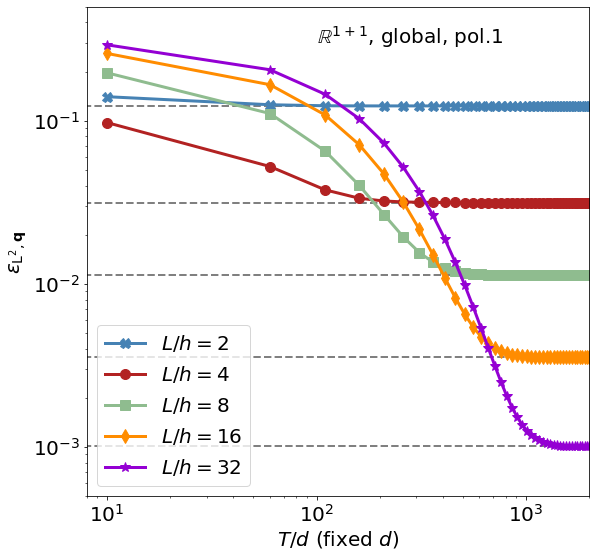

In [2]:
%pylab inline
import matplotlib.pyplot as plt

err_lv0 = array(matrix('10      0.140222;\
60      0.125173;\
110     0.123395;\
160     0.12316;\
210     0.123129;\
260     0.123124;\
310     0.123124;\
360     0.123124;\
410     0.123124;\
460     0.123124;\
510     0.123124;\
560     0.123124;\
610     0.123124;\
660     0.123124;\
710     0.123124;\
760     0.123124;\
810     0.123124;\
860     0.123124;\
910     0.123124;\
960     0.123124;\
1010    0.123124;\
1060    0.123124;\
1110    0.123124;\
1160    0.123124;\
1210    0.123124;\
1260    0.123124;\
1310    0.123124;\
1360    0.123124;\
1410    0.123124;\
1460    0.123124;\
1510    0.123124;\
1560    0.123124;\
1610    0.123124;\
1660    0.123124;\
1710    0.123124;\
1760    0.123124;\
1810    0.123124;\
1860    0.123124;\
1910    0.123124;\
1960    0.123124;\
2010    0.123124;\
2060    0.123124'))

err_lv1 = array(matrix('10      0.0972833;\
60      0.0523212;\
110     0.0376294;\
160     0.0334272;\
210     0.0321615;\
260     0.0317337;\
310     0.0315766;\
360     0.0315165;\
410     0.031493;\
460     0.0314838;\
510     0.0314802;\
560     0.0314788;\
610     0.0314782;\
660     0.031478;\
710     0.0314779;\
760     0.0314778;\
810     0.0314778;\
860     0.0314778;\
910     0.0314778;\
960     0.0314778;\
1010    0.0314778;\
1060    0.0314778;\
1110    0.0314778;\
1160    0.0314778;\
1210    0.0314778;\
1260    0.0314778;\
1310    0.0314778;\
1360    0.0314778;\
1410    0.0314778;\
1460    0.0314778;\
1510    0.0314778;\
1560    0.0314778;\
1610    0.0314778;\
1660    0.0314778;\
1710    0.0314778;\
1760    0.0314778;\
1810    0.0314778;\
1860    0.0314778;\
1910    0.0314778;\
1960    0.0314778;\
2010    0.0314778;\
2060    0.0314778'))

err_lv2 = array(matrix('10      0.19642;\
60      0.110553;\
110     0.0650183;\
160     0.0400881;\
210     0.0265558;\
260     0.0193278;\
310     0.0155314;\
360     0.0135518;\
410     0.0125134;\
460     0.0119615;\
510     0.0116643;\
560     0.0115026;\
610     0.011414;\
660     0.0113653;\
710     0.0113385;\
760     0.0113237;\
810     0.0113155;\
860     0.011311;\
910     0.0113085;\
960     0.0113071;\
1010    0.0113063;\
1060    0.0113059;\
1110    0.0113057;\
1160    0.0113056;\
1210    0.0113055;\
1260    0.0113054;\
1310    0.0113054;\
1360    0.0113054;\
1410    0.0113054;\
1460    0.0113054;\
1510    0.0113054;\
1560    0.0113054;\
1610    0.0113054;\
1660    0.0113054;\
1710    0.0113054;\
1760    0.0113054;\
1810    0.0113054;\
1860    0.0113054;\
1910    0.0113054;\
1960    0.0113054;\
2010    0.0113054;\
2060    0.0113054'))

err_lv3 = array(matrix('10      0.258267;\
60      0.166085;\
110     0.108371;\
160     0.0711565;\
210     0.0471037;\
260     0.0315572;\
310     0.0215158;\
360     0.0150398;\
410     0.0108742;\
460     0.00820545;\
510     0.00650417;\
560     0.00542467;\
610     0.00474159;\
660     0.00430933;\
710     0.00403511;\
760     0.00386049;\
810     0.00374888;\
860     0.00367728;\
910     0.00363124;\
960     0.00360158;\
1010    0.00358244;\
1060    0.00357009;\
1110    0.0035621;\
1160    0.00355694;\
1210    0.0035536;\
1260    0.00355145;\
1310    0.00355005;\
1360    0.00354915;\
1410    0.00354856;\
1460    0.00354819;\
1510    0.00354794;\
1560    0.00354778;\
1610    0.00354768;\
1660    0.00354761;\
1710    0.00354757;\
1760    0.00354754;\
1810    0.00354753;\
1860    0.00354752;\
1910    0.00354751;\
1960    0.0035475;\
2010    0.0035475;\
2060    0.0035475'))

err_lv4 = array(matrix('10      0.291691;\
60      0.205137;\
110     0.145099;\
160     0.102729;\
210     0.0728122;\
260     0.0516851;\
310     0.0367648;\
360     0.026228;\
410     0.0187872;\
460     0.0135332;\
510     0.00982412;\
560     0.00720652;\
610     0.00536032;\
660     0.00405943;\
710     0.00314411;\
760     0.00250134;\
810     0.00205101;\
860     0.00173624;\
910     0.00151663;\
960     0.00136355;\
1010    0.00125683;\
1060    0.00118235;\
1110    0.00113029;\
1160    0.00109382;\
1210    0.00106824;\
1260    0.00105026;\
1310    0.00103762;\
1360    0.00102871;\
1410    0.00102243;\
1460    0.001018;\
1510    0.00101488;\
1560    0.00101267;\
1610    0.00101112;\
1660    0.00101002;\
1710    0.00100924;\
1760    0.00100869;\
1810    0.00100831;\
1860    0.00100803;\
1910    0.00100784;\
1960    0.00100771;\
2010    0.00100761;\
2060    0.00100754'))

e_1d_rg1 = array(matrix('3 0    0.123124;\
8 1    0.0314778;\
17 2    0.0113054;\
28 3    0.00354749;\
45 4    0.00100738'))

print (2**(e_1d_rg1[:,1]+1))

fig1, ax1 = plt.subplots(figsize=(9,9))

l0 = ax1.plot((0,2000),(e_1d_rg1[0,2],e_1d_rg1[0,2]),color='grey',linestyle='--',linewidth=2)
l1 = ax1.plot((0,2000),(e_1d_rg1[1,2],e_1d_rg1[1,2]),color='grey',linestyle='--',linewidth=2)
l2 = ax1.plot((0,2000),(e_1d_rg1[2,2],e_1d_rg1[2,2]),color='grey',linestyle='--',linewidth=2)
l3 = ax1.plot((0,2000),(e_1d_rg1[3,2],e_1d_rg1[3,2]),color='grey',linestyle='--',linewidth=2)
l4 = ax1.plot((0,2000),(e_1d_rg1[4,2],e_1d_rg1[4,2]),color='grey',linestyle='--',linewidth=2)

c0 = ax1.plot (err_lv0[:,0],err_lv0[:,1],
               marker='X',markersize=10,c='steelblue',linewidth=3,
               label='$L/h = 2$')
c1 = ax1.plot (err_lv1[:,0],err_lv1[:,1],
               marker='o',markersize=10,c='firebrick',linewidth=3,
               label='$L/h = 4$')
c2 = ax1.plot (err_lv2[:,0],err_lv2[:,1],
               marker='s',markersize=10,c='darkseagreen',linewidth=3,
               label='$L/h = 8$')
c3 = ax1.plot (err_lv3[:,0],err_lv3[:,1],
               marker='d',markersize=10,c='darkorange',linewidth=3,
               label='$L/h = 16$')
c4 = ax1.plot (err_lv4[:,0],err_lv4[:,1],
               marker='*',markersize=10,c='darkviolet',linewidth=3,
               label='$L/h = 32$')
ax1.legend(loc=3,fontsize='20')
ax1.set_xlim((8,2000))
ax1.set_ylim((0.0005,0.5))
ax1.set_xscale("log", nonposx='clip')
ax1.set_yscale("log", nonposy='clip')
ax1.set_xlabel(r'$T/d$ (fixed $d$)',fontsize='20')
ax1.set_ylabel(r'$\epsilon_{\mathrm{L}^2,\mathbf{q}}$',fontsize='20')
ax1.tick_params(axis='both', which='major', labelsize='20')

ax1.text(100,0.3,r'$\mathbb{R}^{1+1}$, global, pol.1',fontsize=20)

#fig1.tight_layout()

savefig('Dxx_evo.pdf')

#### fixed totoal time (convergence check)

Populating the interactive namespace from numpy and matplotlib
[ 2.  4.  8. 16. 32.]


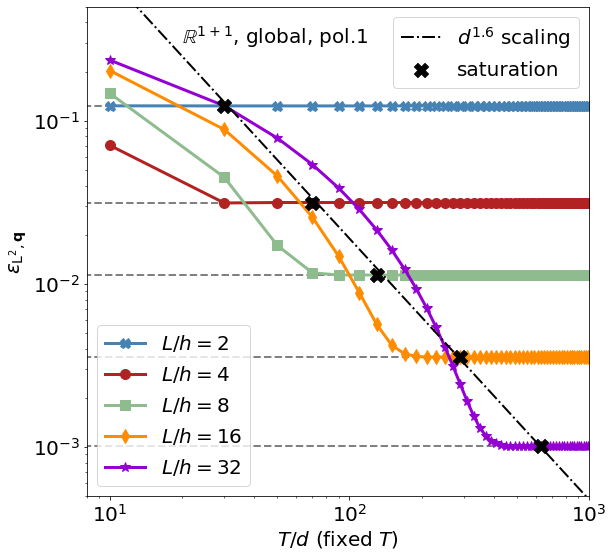

In [3]:
%pylab inline
import matplotlib.pyplot as plt

err_lv0 = array(matrix('10      0.123296;\
30      0.123124;\
50      0.123124;\
70      0.123124;\
90      0.123124;\
110     0.123124;\
130     0.123124;\
150     0.123124;\
170     0.123124;\
190     0.123124;\
210     0.123124;\
230     0.123124;\
250     0.123124;\
270     0.123124;\
290     0.123124;\
310     0.123124;\
330     0.123124;\
350     0.123124;\
370     0.123124;\
390     0.123124;\
410     0.123124;\
430     0.123124;\
450     0.123124;\
470     0.123124;\
490     0.123124;\
510     0.123124;\
530     0.123124;\
550     0.123124;\
570     0.123124;\
590     0.123124;\
610     0.123124;\
630     0.123124;\
650     0.123124;\
670     0.123124;\
690     0.123124;\
710     0.123124;\
730     0.123124;\
750     0.123124;\
770     0.123124;\
790     0.123124;\
810     0.123124;\
830     0.123124;\
850     0.123124;\
870     0.123124;\
890     0.123124;\
910     0.123124;\
930     0.123124;\
950     0.123124;\
970     0.123124;\
990     0.123124'))

err_lv1 = array(matrix('10      0.0704785;\
30      0.0312746;\
50      0.0314775;\
70      0.0314778;\
90      0.0314778;\
110     0.0314778;\
130     0.0314778;\
150     0.0314778;\
170     0.0314778;\
190     0.0314778;\
210     0.0314778;\
230     0.0314778;\
250     0.0314778;\
270     0.0314778;\
290     0.0314778;\
310     0.0314778;\
330     0.0314778;\
350     0.0314778;\
370     0.0314778;\
390     0.0314778;\
410     0.0314778;\
430     0.0314778;\
450     0.0314778;\
470     0.0314778;\
490     0.0314778;\
510     0.0314778;\
530     0.0314778;\
550     0.0314778;\
570     0.0314778;\
590     0.0314778;\
610     0.0314778;\
630     0.0314778;\
650     0.0314778;\
670     0.0314778;\
690     0.0314778;\
710     0.0314778;\
730     0.0314778;\
750     0.0314778;\
770     0.0314778;\
790     0.0314778;\
810     0.0314778;\
830     0.0314778;\
850     0.0314778;\
870     0.0314778;\
890     0.0314778;\
910     0.0314778;\
930     0.0314778;\
950     0.0314778;\
970     0.0314778;\
990     0.0314778'))

err_lv2 = array(matrix('10      0.146773;\
30      0.0449404;\
50      0.017158;\
70      0.0116666;\
90      0.0113112;\
110     0.0113053;\
130     0.0113054;\
150     0.0113054;\
170     0.0113054;\
190     0.0113054;\
210     0.0113054;\
230     0.0113054;\
250     0.0113054;\
270     0.0113054;\
290     0.0113054;\
310     0.0113054;\
330     0.0113054;\
350     0.0113054;\
370     0.0113054;\
390     0.0113054;\
410     0.0113054;\
430     0.0113054;\
450     0.0113054;\
470     0.0113054;\
490     0.0113054;\
510     0.0113054;\
530     0.0113054;\
550     0.0113054;\
570     0.0113054;\
590     0.0113054;\
610     0.0113054;\
630     0.0113054;\
650     0.0113054;\
670     0.0113054;\
690     0.0113054;\
710     0.0113054;\
730     0.0113054;\
750     0.0113054;\
770     0.0113054;\
790     0.0113054;\
810     0.0113054;\
830     0.0113054;\
850     0.0113054;\
870     0.0113054;\
890     0.0113054;\
910     0.0113054;\
930     0.0113054;\
950     0.0113054;\
970     0.0113054;\
990     0.0113054'))

err_lv3 = array(matrix('10      0.202608;\
30      0.088268;\
50      0.0457537;\
70      0.0255916;\
90      0.0147863;\
110     0.0087905;\
130     0.0056255;\
150     0.00420578;\
170     0.00371408;\
190     0.00358235;\
210     0.00355362;\
230     0.0035484;\
250     0.0035476;\
270     0.00354751;\
290     0.0035475;\
310     0.0035475;\
330     0.0035475;\
350     0.0035475;\
370     0.0035475;\
390     0.0035475;\
410     0.0035475;\
430     0.0035475;\
450     0.0035475;\
470     0.0035475;\
490     0.0035475;\
510     0.0035475;\
530     0.0035475;\
550     0.0035475;\
570     0.0035475;\
590     0.0035475;\
610     0.0035475;\
630     0.0035475;\
650     0.0035475;\
670     0.0035475;\
690     0.0035475;\
710     0.0035475;\
730     0.0035475;\
750     0.0035475;\
770     0.0035475;\
790     0.0035475;\
810     0.0035475;\
830     0.0035475;\
850     0.0035475;\
870     0.0035475;\
890     0.0035475;\
910     0.0035475;\
930     0.0035475;\
950     0.0035475;\
970     0.0035475;\
990     0.0035475'))

err_lv4 = array(matrix('10      0.23494;\
30      0.12334;\
50      0.0781339;\
70      0.0538106;\
90      0.0386869;\
110     0.028521;\
130     0.0213515;\
150     0.0161323;\
170     0.012251;\
190     0.0093241;\
210     0.00709927;\
230     0.00540355;\
250     0.00411447;\
270     0.00314311;\
290     0.0024234;\
310     0.00190484;\
330     0.00154675;\
350     0.00131338;\
370     0.00117146;\
390     0.00109102;\
410     0.00104823;\
430     0.00102663;\
450     0.00101618;\
470     0.00101131;\
490     0.00100912;\
510     0.00100817;\
530     0.00100777;\
550     0.0010076;\
570     0.00100754;\
590     0.00100752;\
610     0.00100751;\
630     0.0010075;\
650     0.0010075;\
670     0.0010075;\
690     0.0010075;\
710     0.0010075;\
730     0.0010075;\
750     0.0010075;\
770     0.0010075;\
790     0.0010075;\
810     0.0010075;\
830     0.0010075;\
850     0.0010075;\
870     0.0010075;\
890     0.0010075;\
910     0.0010075;\
930     0.0010075;\
950     0.0010075;\
970     0.0010075;\
990     0.0010075'))

e_1d_rg1 = array(matrix('3 0    0.123124;\
8 1    0.0314778;\
17 2    0.0113054;\
28 3    0.00354749;\
45 4    0.00100738'))

print (2**(e_1d_rg1[:,1]+1))

fig1, ax1 = plt.subplots(figsize=(9,9))

l0 = ax1.plot((0,2000),(e_1d_rg1[0,2],e_1d_rg1[0,2]),color='grey',linestyle='--',linewidth=2)
l1 = ax1.plot((0,2000),(e_1d_rg1[1,2],e_1d_rg1[1,2]),color='grey',linestyle='--',linewidth=2)
l2 = ax1.plot((0,2000),(e_1d_rg1[2,2],e_1d_rg1[2,2]),color='grey',linestyle='--',linewidth=2)
l3 = ax1.plot((0,2000),(e_1d_rg1[3,2],e_1d_rg1[3,2]),color='grey',linestyle='--',linewidth=2)
l4 = ax1.plot((0,2000),(e_1d_rg1[4,2],e_1d_rg1[4,2]),color='grey',linestyle='--',linewidth=2)

c0 = ax1.plot (err_lv0[:,0],err_lv0[:,1],
               marker='X',markersize=10,c='steelblue',linewidth=3,
               label='$L/h = 2$')
c1 = ax1.plot (err_lv1[:,0],err_lv1[:,1],
               marker='o',markersize=10,c='firebrick',linewidth=3,
               label='$L/h = 4$')
c2 = ax1.plot (err_lv2[:,0],err_lv2[:,1],
               marker='s',markersize=10,c='darkseagreen',linewidth=3,
               label='$L/h = 8$')
c3 = ax1.plot (err_lv3[:,0],err_lv3[:,1],
               marker='d',markersize=10,c='darkorange',linewidth=3,
               label='$L/h = 16$')
c4 = ax1.plot (err_lv4[:,0],err_lv4[:,1],
               marker='*',markersize=10,c='darkviolet',linewidth=3,
               label='$L/h = 32$')

ax1.legend(loc=3,fontsize='20')
ax1.set_xlim((8,1000))
ax1.set_ylim((0.0005,0.5))
ax1.set_xscale("log", nonposx='clip')
ax1.set_yscale("log", nonposy='clip')
ax1.set_xlabel(r'$T/d$ (fixed $T$)',fontsize='20')
ax1.set_ylabel(r'$\epsilon_{\mathrm{L}^2,\mathbf{q}}$',fontsize='20')
ax1.tick_params(axis='both', which='major', labelsize='20')

ax2 = ax1.twinx()

# saturation position is chosen below 1E-6 relative error
s = array(matrix('30      0.123124;\
70      0.0314778;\
130     0.0113054;\
290     0.0035475;\
630     0.0010075'))
ax2.scatter (s[:,0],s[:,1],marker='X',s=200,c='black',label=r'saturation')

s = np.linspace(1,3000,100)
ax2.plot(s,3.0e+1*s**(-1.6),linestyle='-.',linewidth=2,color='k',label=r'$d^{1.6}$ scaling')

ax2.set_yscale("log", nonposy='clip')
ax2.set_ylim((0.0005,0.5))
ax2.legend(loc=1,fontsize='20')
plt.axis('off')

#fig1.tight_layout()

ax1.text(20,0.3,r'$\mathbb{R}^{1+1}$, global, pol.1',fontsize=20)

savefig('Dxx_conv.pdf')

## execute the corresponding example and check if above figures can be recovered